<a href="https://colab.research.google.com/github/Aryan-Gupta2002/Deep-Learning---Tensorflow/blob/main/neuralNetworkForRegression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From previous notebook of neural networks for regression analysis

###Evaluating a model  
In practice, a typical workflow , we go through when building a neural network  
Build a model -> fit it -> evaluate it -> tweak the model -> fit it-> evaluate-> repeat  

It's a good idea to visualize the training process :
  
*The data- What are we working with ?  
*The model itself- What does our model look like ?  
*Training the model - how does the model perform ?  
*The prediction of the model - Have a idea about the prediction  

### Making a larger Dataset

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
print(tf.__version__,np.__version__,matplotlib.__version__)

2.19.0 2.0.2 3.10.0


In [46]:
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [47]:
y = x+12
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-88, -84, -80, -76, -72, -68, -64, -60, -56, -52, -48, -44, -40,
       -36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8,  12,
        16,  20,  24,  28,  32,  36,  40,  44,  48,  52,  56,  60,  64,
        68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

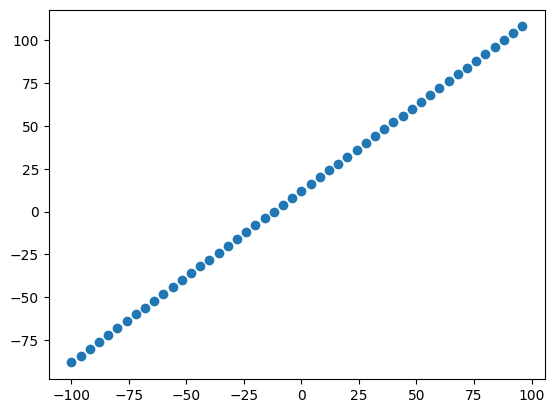

In [48]:
plt.scatter(x,y)

In [49]:
# import tensorflow_datasets as tfds
# ds_train = tfds.load('x', split='train[:75%]')

### The 3 sets of data we need to properly optimize our model  
•Training Set  
•Validation Set (OPTIONAL)  
•Test Set
### Goal: **Generalization** is the ability of a machine learning model to perform well on data, it has not seen before

In [50]:
# Checking how many samples we have
len(x)

50

In [51]:
#Splittimg the data into training and testing sets
x_train = x[:40]
y_train = y[:40]

x_test=x[40:]
y_test =y[40:]
len(x_test),len(x_train),len(y_test),len(y_train)

(10, 40, 10, 40)

###Visualizing the data
Now we seperated out data, we must visualize

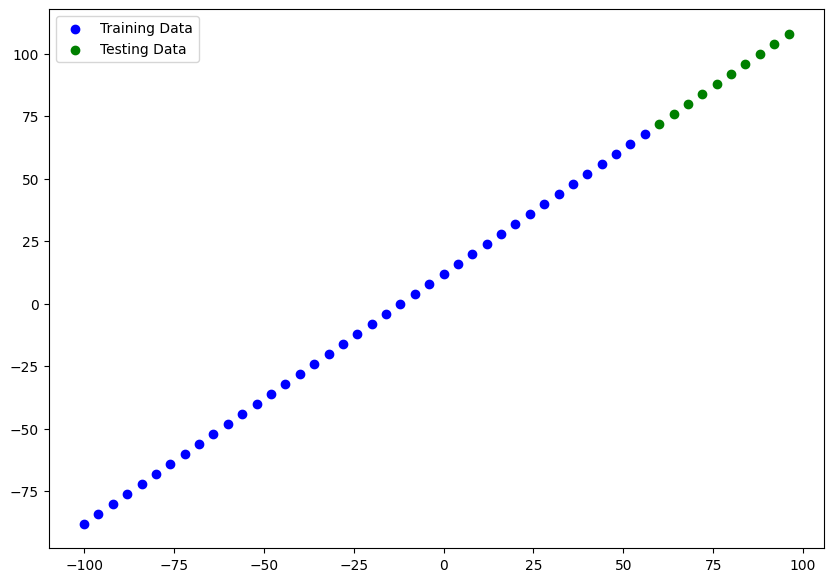

In [52]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c="b",label="Training Data")
plt.scatter(x_test,y_test,c="g",label="Testing Data")
plt.legend() #legend() gives information about the different datasets

In [53]:
#Let's Train our model from the above datasets
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])
model1.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model1.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 62.5930 - mae: 62.5930
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 21.1842 - mae: 21.1842
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.7341 - mae: 12.7341
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 14.2478 - mae: 14.2478
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 15.6917 - mae: 15.6917 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 18.6171 - mae: 18.6171
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 11.7163 - mae: 11.7163
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.8027 - mae: 12.8027 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 13.9135 - mae: 13.9135 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 15.0644 - mae: 15.0644
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 16.9476 - mae: 16.9476
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 13.9255 - mae: 13.9255
Epoch 13/100
2/2 ━━━

tf.expand_dims(x_train,axis=-1)It adds a new dimension (axis) to the tensor  
keras.Dense expects (batch_size, features)    
x_train_exp = tf.expand_dims(x_train, axis=-1)  
x_train_exp.shape  
(1000, 1)  
axis=-1 means “add the new axis at the last position”

### Visualizing Our Model

In [54]:
# input shape tells us, how many input variables are there for each sample
x[0].shape,y[0].shape

(TensorShape([]), TensorShape([]))

In [55]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(2,input_shape=[1],name="Input layer name"),
    tf.keras.layers.Dense(1,name="Second Hidden"),
    tf.keras.layers.Dense(1,name="Output layer")
],name="One of the many models...")
model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# NOTE: Loss and Metric is set to MAE, model.evaluate() method will give MAE as loss calculated

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model2.summary()

Model: "One of the many models..."

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input layer name (Dense)        │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second Hidden (Dense)           │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output layer (Dense)            │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Params - total no. of parameters in the model.  
*Trainable params- These are the parameters the model can update as it learns  
*Non-trainable params- These params are not updated during training. (this typically occurs when we bring in already learned parameters from models during **transfer learning**)  
**Resource** MITs Introduction to Deep Learning course

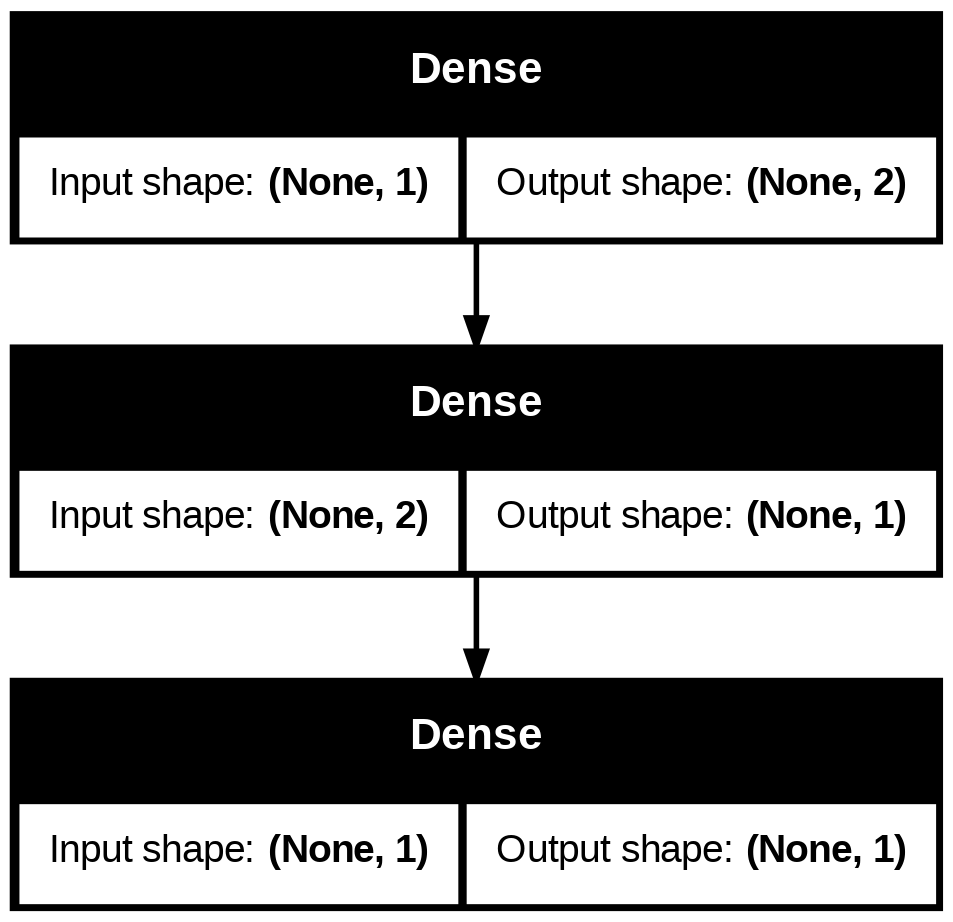

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(model=model2,show_shapes=True)

###Visualizing our model's prediction

In [58]:
y_pred=model1.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[58.711246],
       [62.466393],
       [66.221535],
       [69.97668 ],
       [73.73182 ],
       [77.48696 ],
       [81.2421  ],
       [84.997246],
       [88.75239 ],
       [92.50753 ]], dtype=float32)

In [59]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

###Creating a Plotting function

In [60]:
def plot_prediction(training_data=x_train,
                    training_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(training_data,training_labels,c="b",label="training data")
  plt.scatter(test_data,test_labels,c="g",label="test data")
  #Plotting model's predictions in red
  plt.scatter(test_data ,predictions,c="r",label="Predictions")
  plt.legend()

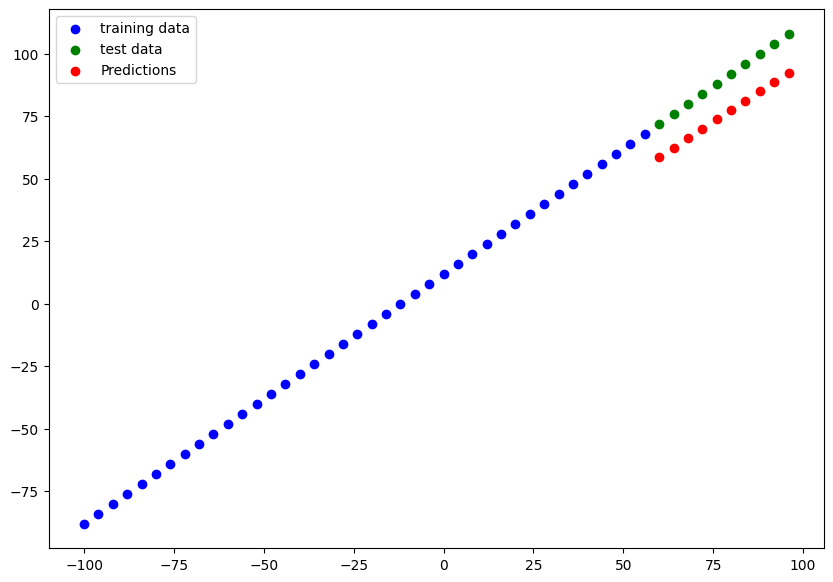

In [61]:
plot_prediction()

###Evaluating our model's predictions with regression evaluation metrics  
There are different types of evaluation metrics such as    
*MSE Mean Squared Error  
*MAE Mean Absolute Error

In [62]:
model1.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 14.3906 - mae: 14.3906


[14.390609741210938, 14.390609741210938]

tf.keras.losses.MAE()  or tf.metrics.mean_absolute_error()  
tf.keras.losses.MSE()  or  tf.metrics.mean_squared_error()  
tf.keras.losses.Huber()  
**Note**- While evaluating the model, keep in mind that the shape of y actual and y predicted should be same.  
**Tip**- you can use tf.squeeze(y_pred)  
tf.squeeze(input) = Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed. If you don't want to remove all size 1 dimensions, you can remove specific size 1 dimensions by specifying axis.

In [63]:
tf.keras.losses.MAE(y_pred,y_test)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([14., 14., 14., 15., 15., 15., 15., 16., 16., 16.], dtype=float32)>

In [64]:
y_pred # y_pred is an array but y-test is a tensor

array([[58.711246],
       [62.466393],
       [66.221535],
       [69.97668 ],
       [73.73182 ],
       [77.48696 ],
       [81.2421  ],
       [84.997246],
       [88.75239 ],
       [92.50753 ]], dtype=float32)

In [65]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

In [66]:
y_pred=tf.constant(y_pred) # Shape mismatch

In [67]:
y_pred=tf.squeeze(y_pred)

In [68]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([58.711246, 62.466393, 66.221535, 69.97668 , 73.73182 , 77.48696 ,
       81.2421  , 84.997246, 88.75239 , 92.50753 ], dtype=float32)>

In [69]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

In [70]:
mae1=tf.keras.losses.MAE(y_test,y_pred)
mae1

<tf.Tensor: shape=(), dtype=float32, numpy=14.390609741210938>

In [71]:
mse1=tf.keras.losses.MSE(y_test,y_pred)
mse1

<tf.Tensor: shape=(), dtype=float32, numpy=207.5843048095703>

The Huber Loss Function is a popular loss function used primarily in regression tasks. It is designed to be robust to outliers combining the best properties of two common loss functions: Mean Squared Error (MSE) and Mean Absolute Error (MAE). Unlike MSE, which can be heavily influenced by large errors (outliers) and MAE which can be less sensitive to small errors the Huber loss behaves like MSE for small prediction errors and switches to MAE for larger errors. This is useful when your dataset contains noisy data or outliers, helping models learn more reliably and avoid being skewed by extreme values.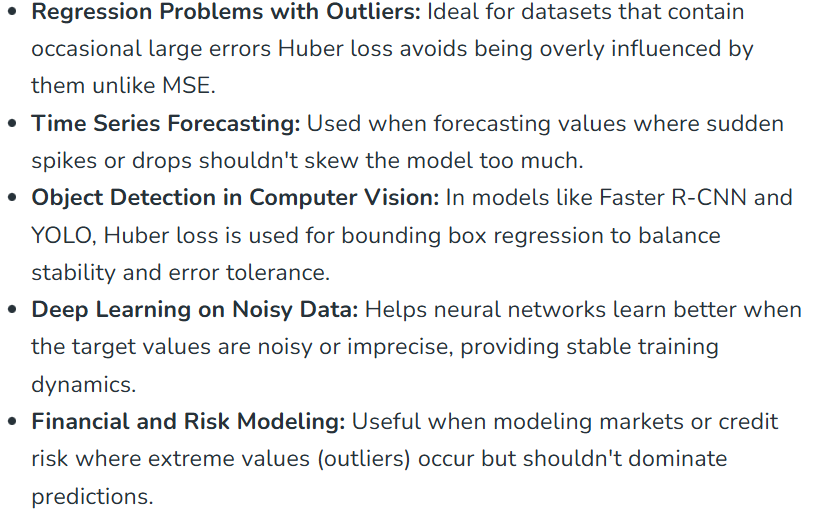

### Running Experiments to improve our Model  
Why tf.random.set_seed(42) before each model?  
Neural networks use randomness for:  
*weight initialization  
*shuffling data  
*dropout (if used)  

If you don’t set the seed, every time you define/train a model:  
*weights start differently  
*loss curves change  
*final MAE changes

In [72]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model3.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 59.7759 - mae: 59.7759 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 25.7488 - mae: 25.7488
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.7439 - mae: 12.7439
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.3074 - mae: 9.3074
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.2294 - mae: 13.2294
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.1297 - mae: 10.1297
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.6046 - mae: 11.6046
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.1409 - mae: 11.1409
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.8005 - mae: 12.8005
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.5361 - mae: 9.5361
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.2129 - mae: 12.2129
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.7029 - mae: 11.7029
Epoch 13/100
2/2 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[51.147614]
 [54.46408 ]
 [57.78055 ]
 [61.09701 ]
 [64.413475]
 [67.72994 ]
 [71.04641 ]
 [74.36288 ]
 [77.679344]
 [80.99581 ]]


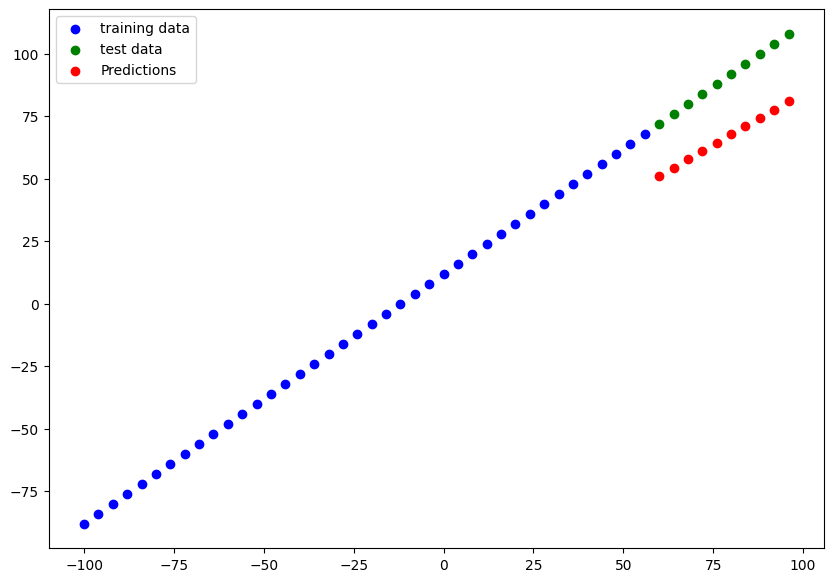

In [73]:
y_pred1=model3.predict(x_test)
print(y_pred1)
plot_prediction(predictions=y_pred1)

In [74]:
mae2=tf.keras.losses.MAE(y_test,tf.squeeze(y_pred1))
mae2

<tf.Tensor: shape=(), dtype=float32, numpy=23.928287506103516>

In [75]:
mse2=tf.keras.losses.MSE(y_test,tf.squeeze(y_pred1))
mse2

<tf.Tensor: shape=(), dtype=float32, numpy=576.4176025390625>

In [76]:
tf.random.set_seed(42)
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])
model4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)
# NOTE: SGD optimizer updates weights by calculating loss with MAE.
# mse metrics is just to show the output
model4.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 39.6954 - mse: 2371.5254 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 28.5921 - mse: 1240.7024
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 24.4656 - mse: 852.6953
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 22.9794 - mse: 717.0860
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 18.9681 - mse: 496.3855
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 17.7219 - mse: 431.5390
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.8075 - mse: 210.6586
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.2006 - mse: 226.8858
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.4729 - mse: 200.3659
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.9234 - mse: 217.6402
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.3217 - mse: 194.9265
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.8112 - mse: 212.7518
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[48.69055 ]
 [51.78293 ]
 [54.875305]
 [57.967678]
 [61.060062]
 [64.15244 ]
 [67.24482 ]
 [70.3372  ]
 [73.42958 ]
 [76.52195 ]]


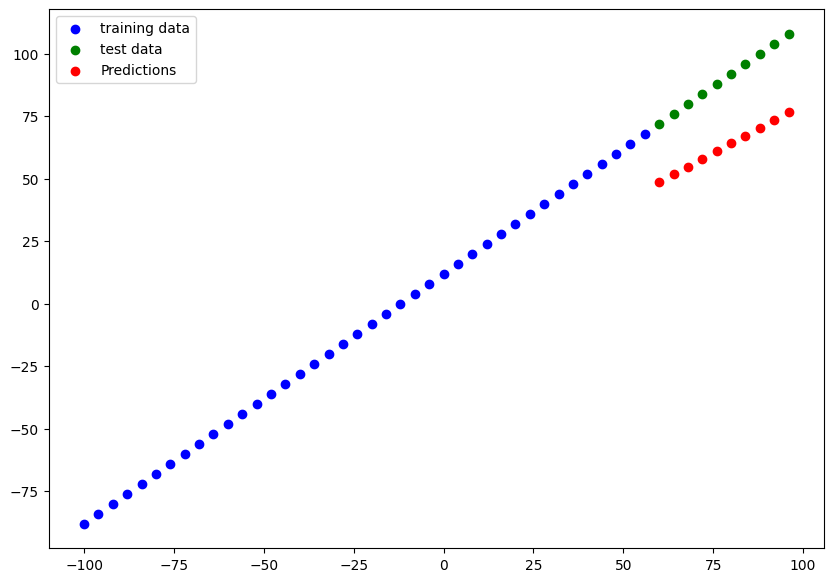

In [77]:
y_pred2=model4.predict(x_test)
print(y_pred2)
plot_prediction(predictions=y_pred2)

In [78]:
mae3=tf.keras.losses.MAE(y_test,tf.squeeze(y_pred2))
mse3=tf.keras.losses.MSE(y_test,tf.squeeze(y_pred2))
mae3,mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=27.393747329711914>,
 <tf.Tensor: shape=(), dtype=float32, numpy=757.2135620117188>)

In [79]:
tf.random.set_seed(42)
model5=tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])
model5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)
model5.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=200)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 33.4398 - mse: 1540.3574 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 18.7140 - mse: 512.6277
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 20.8231 - mse: 581.0837
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.3242 - mse: 269.4695
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 16.7208 - mse: 381.0367
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.3596 - mse: 227.3678
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.6737 - mse: 202.2392
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.1735 - mse: 220.2810
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.5820 - mse: 198.2485
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.1154 - mse: 216.9071
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.5710 - mse: 196.5774
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.1283 - mse: 215.6918
Epoch 13/20

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[36.245445]
 [38.418354]
 [40.591267]
 [42.764175]
 [44.93709 ]
 [47.11    ]
 [49.282913]
 [51.455822]
 [53.62874 ]
 [55.801647]]


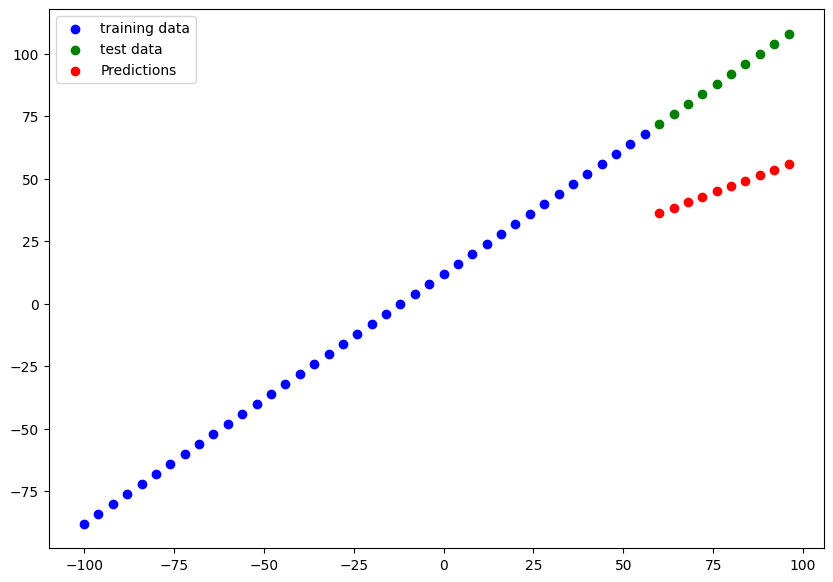

In [80]:
y_pred3=model5.predict(x_test)
print(y_pred3)
plot_prediction(predictions=y_pred3)

In [81]:
mae4=tf.keras.losses.MAE(y_test,tf.squeeze(y_pred3))
mse4=tf.keras.losses.MSE(y_test,tf.squeeze(y_pred3))
mae4,mse4

(<tf.Tensor: shape=(), dtype=float32, numpy=43.97645568847656>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1961.4691162109375>)

In [82]:
tf.random.set_seed(42)
model6=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model6.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model6.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=25)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 80.7350 - mae: 80.7350 
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 45.7375 - mae: 45.7375
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 14.2666 - mae: 14.2666
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.3087 - mae: 10.3087
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.1755 - mae: 10.1755
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.9521 - mae: 9.9521
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.6708 - mae: 10.6708
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.7666 - mae: 9.7666
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.3135 - mae: 10.3135
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.1803 - mae: 10.1803
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 9.9449 - mae: 9.9449
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.6871 - mae: 10.6871
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[47.07926 ]
 [50.19617 ]
 [53.31308 ]
 [56.42999 ]
 [59.546898]
 [62.663807]
 [65.780716]
 [68.89762 ]
 [72.01453 ]
 [75.13144 ]]


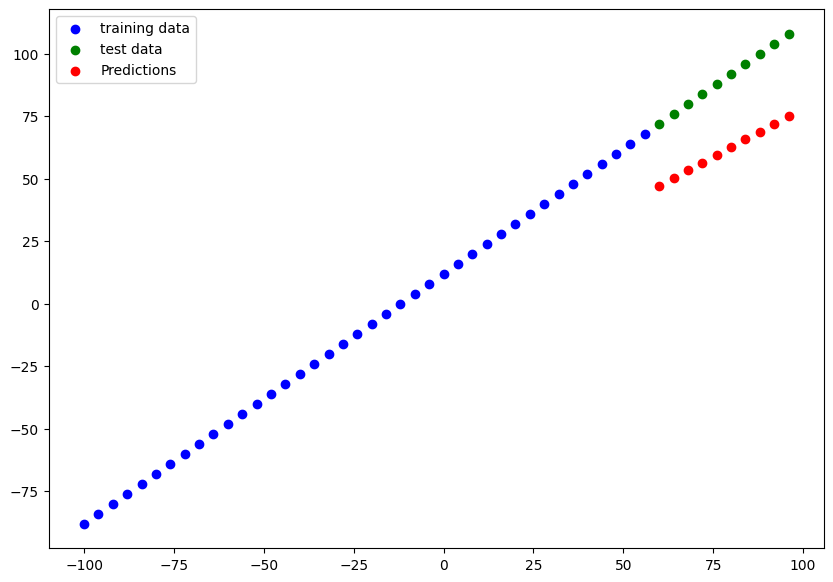

In [83]:
y_pred4=model6.predict(x_test)
print(y_pred4)
plot_prediction(predictions=y_pred4)

In [84]:
mae5=tf.keras.losses.MAE(y_test,tf.squeeze(y_pred4))
mse5=tf.keras.losses.MSE(y_test,tf.squeeze(y_pred4))
mae5,mse5

(<tf.Tensor: shape=(), dtype=float32, numpy=28.8946475982666>,
 <tf.Tensor: shape=(), dtype=float32, numpy=841.3345947265625>)

### Comparing the results of our experiments using pandas

In [85]:
import pandas as pd
model_results=[["model1",mae1.numpy(),mse1.numpy()],
               ["model3",mae2.numpy(),mse2.numpy()],
               ["model4",mae3.numpy(),mse3.numpy()],
               ["model5",mae4.numpy(),mse4.numpy()],
               ["model6",mae5.numpy(),mse5.numpy()]]
all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model1,14.390610,207.584305
1,model3,23.928288,576.417603
2,model4,27.393747,757.213562
3,model5,43.976456,1961.469116
4,model6,28.894648,841.334595


In [86]:
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [87]:
model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Tools to track Machine Learning progress  
*Tensorboard- A component of the tensorflow library to help track modelling experiments  
*Weights & Biases- a tool for tracking all kinds of ML experiments(plugs into tensorboard)

#Saving Our Model
Saving our model allows us to use them outside of google colab such as in a web application or a mobile app  
There 2 main formats to save our model  
1.The SavedModel format  
2.The HDF5 format

In [89]:
#Save model using the SaveModel format
!rm -rf SavedModel1.keras
model1.save("SavedModel1.keras")

In [ ]:
model1.save("HDF5SavedModel1.h5") # Old Method, not supported now

###Loading saved model

In [91]:
loaded_model = tf.keras.models.load_model("SavedModel1.keras")
loaded_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [93]:
#Comparing model1 predictions with SaveModel fromat model predictions
model1_predNew=model1.predict(x_test)
loaded_model_pred=loaded_model.predict(x_test)
model1_predNew == loaded_model_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [94]:
# Loading h5 model
loadedH5Model=tf.keras.models.load_model('/content/HDF5SavedModel1.h5')

In [95]:
loadedH5Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [96]:
loadedH5Model_pred=loadedH5Model.predict(x_test)
loaded_model_pred==model1_predNew

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])